# Trabajo Práctico N°03 - Señales y Sistemas 1
Una señal es una descripción de como un parámetro esta relacionado con otro parámetro. Por ejemplo, una de las señales mas comunes en electrónica digital es la relación entre la variación del voltaje con respecto al tiempo. Como los dos parámetros asumen un rango continuo de valores, llamamos a este tipo de señales "Señal Continua". Por otra parte, pasar esta señal a través de un convertidor de analógico-digital obliga a que se cuantifique cada uno de los dos parámetros. Por ejemplo, imagine que la conversión se realiza con 12 bits a una velocidad de muestreo de 1000 muestras por segundo. El voltaje se reduce a 4096 ($2^{12}$) posibles niveles binarios, y el tiempo solo se define en incrementos de un milisegundo. Las señales formadas a partir de parámetros que se cuantifican de esta manera se dice que son señales discretas o señales digitales.

La siguiente figura muestra dos señales discretas. El eje vertical, el voltaje en nuestro ejemplo anterior, genéricamente es llamado amplitud. El mismo puede representar voltaje, intensidad de luz, niveles de sonido, etc.

![fig2](img/03-figura2.png)

El eje horizontal, es llamado generalmente "variable independiente" o "dominio". El tiempo es el parámetro normalmente mas utilizado para representar el dominio de una señal. Sin embargo, pueden utilizarse otros parámetros según el área de interés. Si se usa el tiempo, se dice que la señal esta en el dominio del tiempo.

### Media y desviación estándar
La media ($\mu$) de una señal, es el valor promedio de una señal. Siendo $N$ el numero total de muestras y $x_i$ la muestra $i$ de la señal, la media se calcula:

$$\mu=\frac{1}{N}\displaystyle\sum_{i=0}^{N-1}x_i$$

Por otra parte, si tomamos la muestra $i$ de una señal, podemos evaluar que tan lejos/desviada de la media de la señal se encuentra con la siguiente expresión $|x_i-\mu|$. El promedio de la desviación con respecto a la media de todas las muestras de una señal es lo que llamamos "Desviación Promedio". 

La "desviación estándar ($\sigma$)" es similar a la desviación promedio, excepto que el promedio se realiza con elevando a potencia de 2 la desviación de cada punto de la muestra en lugar de usar el valor absoluto:

$$\sigma=\sqrt{\frac{1}{N-1}\displaystyle\sum_{i=0}^{N-1}(x_i-\mu)^2}$$

# Muestreo de señales
Al trabajar con señales, normalmente, es necesario transforma señales continuas, obtenidas a través de instrumentos de medición, y almacenar las mismas en algún formato digital para poder procesarlas posteriormente como señales discretas. Este muestreo no es una cuestión trivial.

La definición de muestreo adecuado es bastante simple. Supongamos que se toman muestras de una señal continua de alguna manera. Si se puede reconstruir exactamente la señal analógica de las muestras, se debe haber hecho el muestreo correcto. Incluso si las muestras parecen confusas o incompletos, la información clave se ha capturado si se puede revertir el proceso.

![fig1](img/03-figura1.png)

### Teorema del muestreo
Esta línea de razonamiento conduce a un hito en DSP, el teorema del muestreo. Frecuentemente también se le llama teorema del muestreo de Shannon, o el teorema del muestreo de Nyquist, después de la publicación los trabajos de los años cuarenta sobre el tema. El teorema de muestreo indica que una señal continua puede ser muestreada apropiadamente, sólo si no contiene componentes de frecuencia por encima de la mitad de la frecuencia de muestreo. 

Por ejemplo, una frecuencia de muestreo de 2000 muestras/segundo requiere que la señal analógica esté compuesta de frecuencias por debajo de 1000 ciclos/segundo. Si la señal posee frecuencias por encima de este límite, la digitalización tendrá algún grado de "aliasing". Esta relación es llamada "Nyquist rate".

Un ejemplo practico, es la digitalización de una señal de audio. Un oído sano y joven es sensible a las frecuencias comprendidas entre los 20 Hz y los 20 kHz. Por ende, el "Nyquist rate" para realizar un muestreo correcto de una señal de audio es igual a $20kHz \cdot 2 = 20000Hz \cdot 2 = 40000$ muestras/segundo.   

#### Definición:
Si una función $x(t)$ no contiene frecuencias mas elevadas que $B$ hertz, es completamente muestreable si se muestrean puntos espaciados cada $1/(2B)$.

# Manejo del ruido
Una primera aproximación para eliminar el ruido de una señal podria ser el de reemplzar cada punto de una señal discreta por un promedio de sus vecinos:

$G[i]=\sum_{u=-1}^1F[i+u]/3$

![fig3](img/03-figura3.png)

Una mejora a este metodo seria ampliar la ventana a mas elemenos y transformarla en una ventana pesada: 

$G[i]=\frac{1}{2k+1}\sum_{u=-k}^kF[i+u]$

![fig4](img/03-figura4.png)

Si lo generalizamos para diferentes pesos: 

$G[i]=\frac{1}{\sum_{u=-k}^kH[u]}\sum_{u=-k}^kH[u]F[i+u]$ 

donde $H[u]$ es un vector de pesos.

![fig5](img/03-figura5.png)

Lo cual es un filtro de correlación cruzada.

## Correlación Cruzada
Si tenemos en cuenta la siguiente señal, a la cual le incorporamos ruido:

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import signal
import numpy as np

sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.normal(0, 0.5, len(sig))

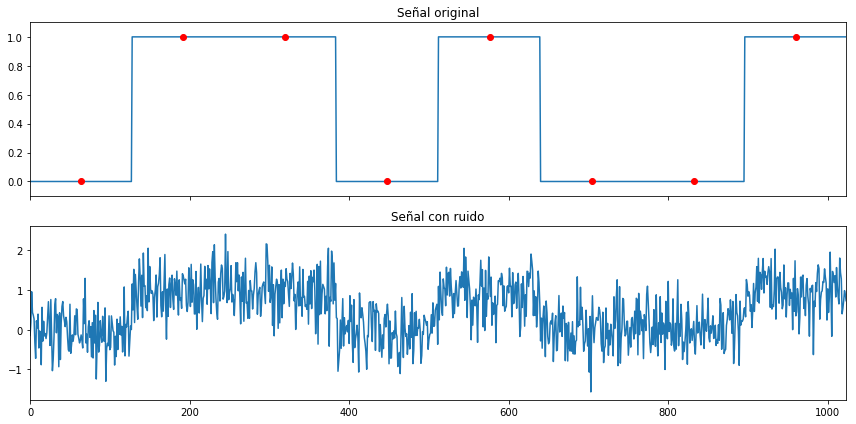

In [2]:
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Señal original')
ax_noise.plot(sig_noise)
ax_noise.set_title('Señal con ruido')
ax_orig.margins(0, 0.1)
fig.tight_layout()

Una forma de reducir el impacto del mismo es utilizando un filtro de correlacion.
En procesamiento de señales, la correlación cruzada (cross-correlation) es una medida de la similitud entre dos señales, frecuentemente usada para encontrar características relevantes en una señal desconocida por medio de la comparación con otra que sí se conoce.

Dadas dos funciones discretas:
$$G=H \otimes F$$
donde:
$$G[i]=\frac{1}{\sum_{u=-k}^kH[u]}\sum_{u=-k}^{k}H[u]F[i+u]$$

En la correlación $H$ es llamado kernel o mascara y $F$ es la señal que se quiere correlacionar.

In [3]:
kernel_size = 3
kernel = np.ones(kernel_size)
corr = signal.correlate(sig_noise, kernel, mode='same') / np.sum(kernel)

/home/ezequiel/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


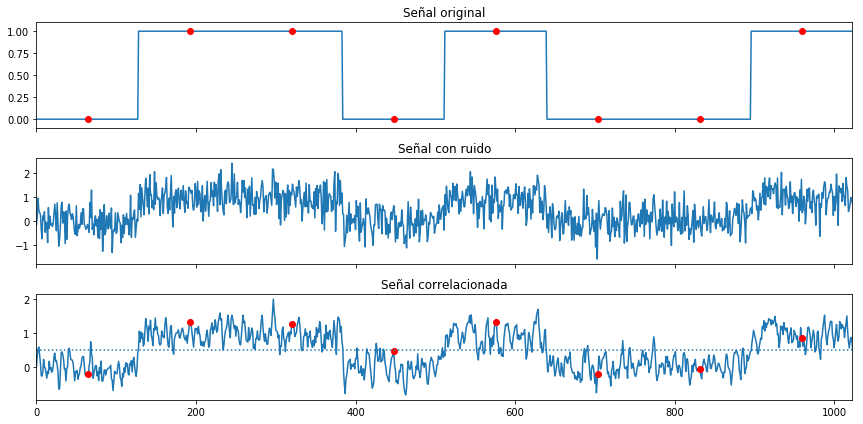

In [4]:
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True, figsize=(12, 6))
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Señal original')
ax_noise.plot(sig_noise)
ax_noise.set_title('Señal con ruido')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Señal correlacionada')
ax_orig.margins(0, 0.1)
fig.tight_layout()

Como se puede apreciar el el grafico anterior, el nivel de ruido disminuye, pero sigue sin reconocerse la señal original.
Si aumentanmos el tamaño del kernel:

/home/ezequiel/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


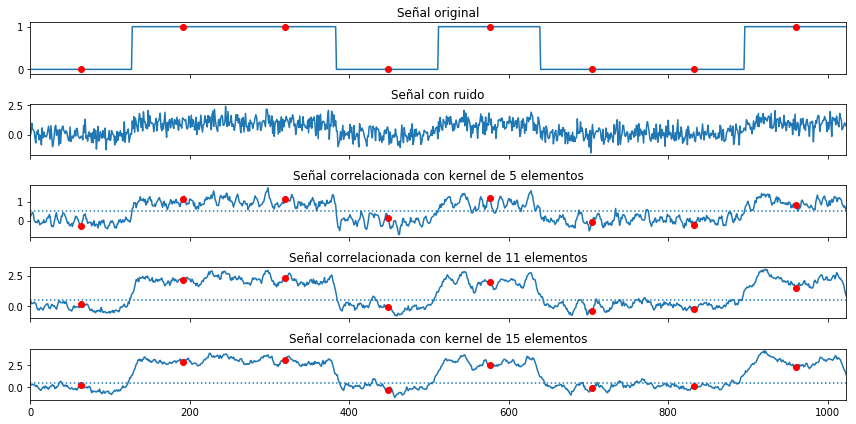

In [8]:
kernel_size = 5
kernel = np.ones(kernel_size)
corr5 = signal.correlate(sig_noise, kernel, mode='same') /  np.sum(kernel)
kernel_size = 11
corr11 = signal.correlate(sig_noise, np.ones(kernel_size), mode='same') /  np.sum(kernel)
kernel_size = 15
corr15 = signal.correlate(sig_noise, np.ones(kernel_size), mode='same') /  np.sum(kernel)
fig, (ax_orig, ax_noise, ax_corr5, ax_corr11, ax_corr15) = plt.subplots(5, 1, sharex=True, figsize=(12, 6))
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Señal original')

ax_noise.plot(sig_noise)
ax_noise.set_title('Señal con ruido')

ax_corr5.plot(corr5)
ax_corr5.plot(clock, corr5[clock], 'ro')
ax_corr5.axhline(0.5, ls=':')
ax_corr5.set_title('Señal correlacionada con kernel de 5 elementos')

ax_corr11.plot(corr11)
ax_corr11.plot(clock, corr11[clock], 'ro')
ax_corr11.axhline(0.5, ls=':')
ax_corr11.set_title('Señal correlacionada con kernel de 11 elementos')

ax_corr15.plot(corr15)
ax_corr15.plot(clock, corr15[clock], 'ro')
ax_corr15.axhline(0.5, ls=':')
ax_corr15.set_title('Señal correlacionada con kernel de 15 elementos')

ax_orig.margins(0, 0.1)
fig.tight_layout()

Ahora claramente se puede visualizar la señal original. La misma no va poder ser recuperada en su totalidad debido que la interferencia que genera el ruido lo hace imposible. Al fin y al cabo, lo que estamos haciendo es promediar los valores adyacentes al punto en cuestion.

## Convolución
Una convolución es un operador matemático que transforma dos funciones f y g en una tercera función que en cierto sentido representa la magnitud en la que se superponen f y una versión trasladada e invertida de g. 

$$G=H\star F$$

$$G[i]=\frac{1}{\sum_{u=-k}^kH[u]}\sum_{u=-k}^{k}H[u]F[i-u]$$

La convolución es similar a la correlación cruzada. Para señales discretas de valores reales, difieren solo en una inversión de tiempo en una de las señales. Para señales continuas, el operador de correlación cruzada es el operador adjunto del operador de convolución.

Una de las propiedades mas importantes de la convolucion es su propiedad conmutativa (ver siguente figura).

### Comparativa (Convolución vs Correlación Cruzada)

![fig6](img/03-figura6.png)

Si tomamos la misma señal que el ejemplo anterior y le aplicamos un filtro de convolución:

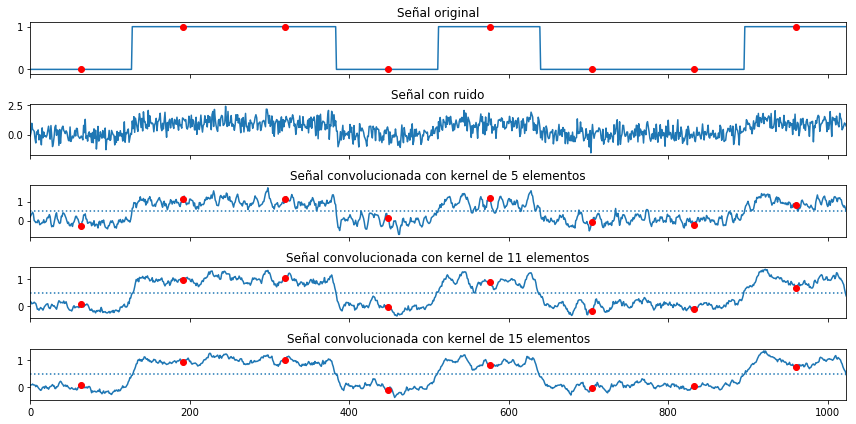

In [9]:
kernel_size = 5
kernel = np.ones(kernel_size)
conv5 = signal.convolve(sig_noise, kernel, mode='same') / np.sum(kernel)
kernel_size = 11
kernel = np.ones(kernel_size)
conv11 = signal.convolve(sig_noise, kernel, mode='same') / np.sum(kernel)
kernel_size = 15
kernel = np.ones(kernel_size)
conv15 = signal.convolve(sig_noise, kernel, mode='same') / np.sum(kernel)
fig, (ax_orig, ax_noise, ax_conv5, ax_conv11, ax_conv15) = plt.subplots(5, 1, sharex=True, figsize=(12, 6))
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Señal original')

ax_noise.plot(sig_noise)
ax_noise.set_title('Señal con ruido')

ax_conv5.plot(conv5)
ax_conv5.plot(clock, conv5[clock], 'ro')
ax_conv5.axhline(0.5, ls=':')
ax_conv5.set_title('Señal convolucionada con kernel de 5 elementos')

ax_conv11.plot(conv11)
ax_conv11.plot(clock, conv11[clock], 'ro')
ax_conv11.axhline(0.5, ls=':')
ax_conv11.set_title('Señal convolucionada con kernel de 11 elementos')

ax_conv15.plot(conv15)
ax_conv15.plot(clock, conv15[clock], 'ro')
ax_conv15.axhline(0.5, ls=':')
ax_conv15.set_title('Señal convolucionada con kernel de 15 elementos')

ax_orig.margins(0, 0.1)
fig.tight_layout()

## Ejercicios
1. En los ejemplos previos. ¿Porque el resultado de aplicar convolución o correlación cruzada es el mismo?
2. Aplicar a la señal con ruido del ejemplo previo, diferentes filtros buscando mejorar la similitud con las señal original.

    Al contar con la señal original, podemos utilizar el *Error cuadratico medio*: 
    $$MSE = \frac{1}{N}\sum_{i=1}^{N}(original_i-aprox_i)^2$$ para comparar la igualdad de las señales obtenidas con las original.

MSE conv5: 0.05233402346892347
MSE conv11: 0.027484135145660858
MSE conv15: 0.02340572154940835


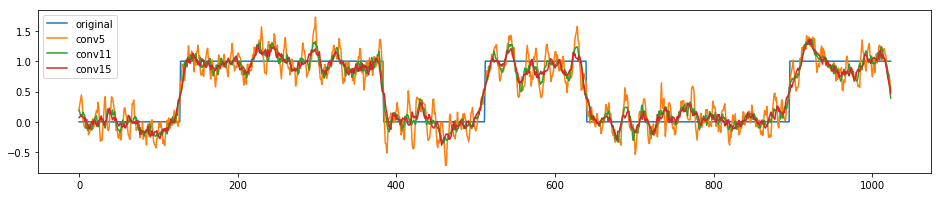

In [11]:
mse_conv5 = (np.square(sig - conv5)).mean()
print('MSE conv5: '+str(mse_conv5))
mse_conv11 = (np.square(sig - conv11)).mean()
print('MSE conv11: '+str(mse_conv11))
mse_conv15 = (np.square(sig - conv15)).mean()
print('MSE conv15: '+str(mse_conv15))

fig, (ax_comp) = plt.subplots(1, 1, sharex=True, figsize=(16, 3))
ax_comp.plot(sig, label='original')
ax_comp.plot(conv5, label='conv5')
ax_comp.plot(conv11, label='conv11')
ax_comp.plot(conv15, label='conv15')
ax_comp.legend()